### Cubic Spline Interpolation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from sklearn.metrics import r2_score
from scipy.interpolate import make_interp_spline

E1=[0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.8,1.0]
eta=[1.09e-3,1.07e-3,1.04e-3,9.17e-4,8.11e-4,7.37e-4,6.87e-4,6.17e-4,5.69e-4]
E2=[0.2,0.3,0.4,0.5,0.6,0.662,0.8,1.0]
R=[0.8841,0.7236,0.5875,0.4912,0.4266,0.3914,0.3373,0.2977]

def E(x):
    return 0.001377*x+0.020206

def tridiagonalmatrix(A,l): ## to solve x for Ax=l
    n=len(A)
    a=[A[i][i] for i in range(n)]
    alpha=[a[i] for i in range(n)]
    beta=[A[i+1][i] for i in range(n-1)]
    b=[A[i+1][i] for i in range(n-1)]
    c=[A[i][i+1] for i in range(n-1)]
    L=[[0 for i in range(n)] for i in range(n)]
    U=[[0 for i in range(n)] for i in range(n)]
    x=[0 for i in range(n)]
    y=[0 for i in range(n)]
    
    for i in range(0,n-1):
        beta[i]=b[i]/alpha[i]
        alpha[i+1]=a[i+1] - beta[i]*c[i]
    
    for i in range(n):
        for j in range(n):
            if i==j: 
                L[i][j]=1
                U[i][j]=alpha[i]
            elif i==j+1: L[i][j]=beta[j]
            elif j==i+1: U[i][j]=c[i]
            else: 
                L[i][j]=0
                U[i][j]=0
    
    y[0]=l[0]
    for i in range(1,n):
        y[i]=l[i] - y[i-1]*beta[i-1]
                
    x[n-1]=y[n-1]/alpha[n-1]
    for i in range(n-2,-1,-1):
        x[i]=(y[i] - c[i]*x[i+1])/alpha[i]
    
    return x


def CubicSplineInterpolation(x, y):
    n=len(x)-1
    M=[0 for i in range(n+1)]
    A=[0 for i in range(n)]
    B=[0 for i in range(n)]
    h=[x[i+1] - x[i] for i in range(n)]
    d=[0 for i in range(n+1)]
    for i in range(1,n):
        d[i]=6*((y[i+1]-y[i])/h[i] - (y[i]-y[i-1])/h[i-1])
        
    H=[[0 for i in range(n+1)] for i in range(n+1)]
    H[0][0]=1
    H[n][n]=1
    # We choose m_0=0, m_n=0
    for i in range(1,n):
        for j in range(0, n+1):
            if j==i-1:    H[i][j]=h[j]
            if j==i:      H[i][j]=2*(h[j-1]+h[j])
            if j==i+1:    H[i][j]=h[i]
    
    M=tridiagonalmatrix(H,d)
    
    for i in range(0,n):
        A[i]=(y[i+1] - y[i])/h[i] - h[i]/6*(M[i+1] - M[i])
        B[i]=y[i] - M[i]*(h[i]**2)/6
    return M, A, B

def cubic_predict(m, fm, x):
    h=[m[i+1]-m[i] for i in range(len(m)-1)]
    M, A, B=CubicSplineInterpolation(m, fm)
    
    j=0
    for i in range(len(m)):
        if (m[i]<=x and m[i+1]>=x): 
            j=i
            break
    if j==len(m)-1: j-=1
    
    prediction = -M[j]/6/h[j]*((x-m[j+1])**3) + M[j+1]/6/h[j]*((x-m[j])**3) + A[j]*(x-m[j]) + B[j]
    return prediction

In [2]:
x=[427,350,280,223,179,153]
Np=[22836,17507,13412,12134,12529,13563]
etax=[cubic_predict(E1,eta,E(x[i])) for i in range(len(x))]
Rx=[cubic_predict(E2,R,E(x[i])) for i in range(len(x))]
angular=[Np[i]/Rx[i]/etax[i] for i in range(len(x))]
relative_data=[angular[i]/angular[0] for i in range(len(angular))]

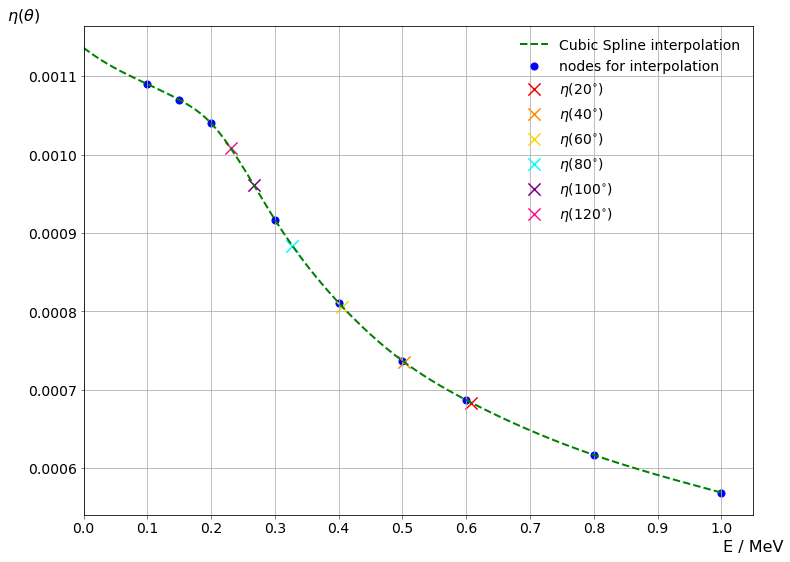

In [3]:
from numpy import array
from numpy import linspace
import matplotlib.pyplot as plt

x_range=linspace(0,1,1000)
y_predict=[cubic_predict(E1,eta,x_range[i]) for i in range(1000)]
y_predict=array(y_predict)
plt.figure(figsize=(12,9))
plt.plot(x_range, y_predict, color='green',linewidth=2.0,linestyle='dashed', label=r'Cubic Spline interpolation')
plt.scatter(E1,eta,s=50,marker='o',color='blue', label='nodes for interpolation')
plt.scatter(E(x[0]),cubic_predict(E1,eta,E(x[0])),s=150,marker='x',color='red', label=r'$\eta(20^{\circ})$')
plt.scatter(E(x[1]),cubic_predict(E1,eta,E(x[1])),s=150,marker='x',color='darkorange', label=r'$\eta(40^{\circ})$')
plt.scatter(E(x[2]),cubic_predict(E1,eta,E(x[2])),s=150,marker='x',color='gold', label=r'$\eta(60^{\circ})$')
plt.scatter(E(x[3]),cubic_predict(E1,eta,E(x[3])),s=150,marker='x',color='cyan', label=r'$\eta(80^{\circ})$')
plt.scatter(E(x[4]),cubic_predict(E1,eta,E(x[4])),s=150,marker='x',color='purple', label=r'$\eta(100^{\circ})$')
plt.scatter(E(x[5]),cubic_predict(E1,eta,E(x[5])),s=150,marker='x',color='deeppink', label=r'$\eta(120^{\circ})$')
#plt.ylim(0,1.1)

x_ticks=linspace(0,1,11)
#y_ticks=linspace(0,1.1,12)
plt.xticks(x_ticks)
#plt.yticks(y_ticks)
plt.tick_params(width=0.5, labelsize=14)
plt.legend(loc='upper right', frameon=False, fontsize=14)
plt.xlim(0,1.05)
ax=plt.gca()
ax.set_xlabel(r'E / MeV', fontsize=16,x=1,y=1)
ax.set_ylabel(r'$\eta(\theta)$', fontsize=16,x=1,y=1,rotation=0)
#ax.spines['right'].set_color('none')
#ax.spines['top'].set_color('none')
#ax.xaxis.set_ticks_position('bottom')
#ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
#ax.spines['left'].set_position(('data',0))
#ax.set_title('y = x^2',fontsize=14,color='r')
plt.grid()
#x_major_locator=MultipleLocator(0.1)
#y_major_locator=MultipleLocator(50)
#ax.xaxis.set_major_locator(x_major_locator)
#ax.yaxis.set_major_locator(y_major_locator)
plt.savefig('./phyex2_fig1.pdf')
plt.show()

### Ready to plot it!

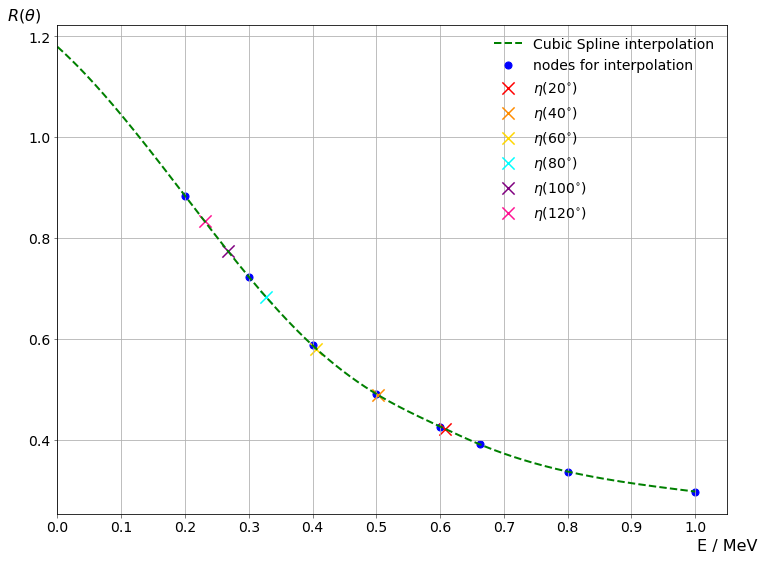

In [4]:
from numpy import array
from numpy import linspace
import matplotlib.pyplot as plt

x_range=linspace(0,1,1000)
y_predict=[cubic_predict(E2,R,x_range[i]) for i in range(1000)]
y_predict=array(y_predict)
plt.figure(figsize=(12,9))
plt.plot(x_range, y_predict, color='green',linewidth=2.0,linestyle='dashed', label=r'Cubic Spline interpolation')
plt.scatter(E2,R,s=50,marker='o',color='blue', label='nodes for interpolation')
plt.scatter(E(x[0]),cubic_predict(E2,R,E(x[0])),s=150,marker='x',color='red', label=r'$\eta(20^{\circ})$')
plt.scatter(E(x[1]),cubic_predict(E2,R,E(x[1])),s=150,marker='x',color='darkorange', label=r'$\eta(40^{\circ})$')
plt.scatter(E(x[2]),cubic_predict(E2,R,E(x[2])),s=150,marker='x',color='gold', label=r'$\eta(60^{\circ})$')
plt.scatter(E(x[3]),cubic_predict(E2,R,E(x[3])),s=150,marker='x',color='cyan', label=r'$\eta(80^{\circ})$')
plt.scatter(E(x[4]),cubic_predict(E2,R,E(x[4])),s=150,marker='x',color='purple', label=r'$\eta(100^{\circ})$')
plt.scatter(E(x[5]),cubic_predict(E2,R,E(x[5])),s=150,marker='x',color='deeppink', label=r'$\eta(120^{\circ})$')
#plt.ylim(0,1.1)

x_ticks=linspace(0,1,11)
#y_ticks=linspace(0,1.1,12)
plt.xticks(x_ticks)
#plt.yticks(y_ticks)
plt.tick_params(width=0.5, labelsize=14)
plt.legend(loc='upper right', frameon=False, fontsize=14)
plt.xlim(0,1.05)
ax=plt.gca()
ax.set_xlabel(r'E / MeV', fontsize=16,x=1,y=1)
ax.set_ylabel(r'$R(\theta)$', fontsize=16,x=1,y=1,rotation=0)
#ax.spines['right'].set_color('none')
#ax.spines['top'].set_color('none')
#ax.xaxis.set_ticks_position('bottom')
#ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
#ax.spines['left'].set_position(('data',0))
#ax.set_title('y = x^2',fontsize=14,color='r')
plt.grid()
#x_major_locator=MultipleLocator(0.1)
#y_major_locator=MultipleLocator(50)
#ax.xaxis.set_major_locator(x_major_locator)
#ax.yaxis.set_major_locator(y_major_locator)
plt.savefig('./phyex2_fig2.pdf')
plt.show()

In [5]:
from numpy import cos
from numpy import pi
from numpy import sin

def cross_section(theta_deg):
    theta = theta_deg*pi/180
    w=0.662
    m=0.5109989376 ## MeV 
    alpha=137.03599976
    wp = w/(1+w/m*(1-cos(theta)))
    return pi*alpha**2/m/m*(wp/w)**2*(wp/w+w/wp-sin(theta)**2)

def relative_xsection(theta):
    return cross_section(theta)/cross_section(20)

In [6]:
def hnu(theta):
    m0c2=0.5109989376 ## MeV
    theta=theta*pi/180
    hnu0=0.662
    hnu=hnu0/(1+hnu0/m0c2*(1-cos(theta)))
    return hnu

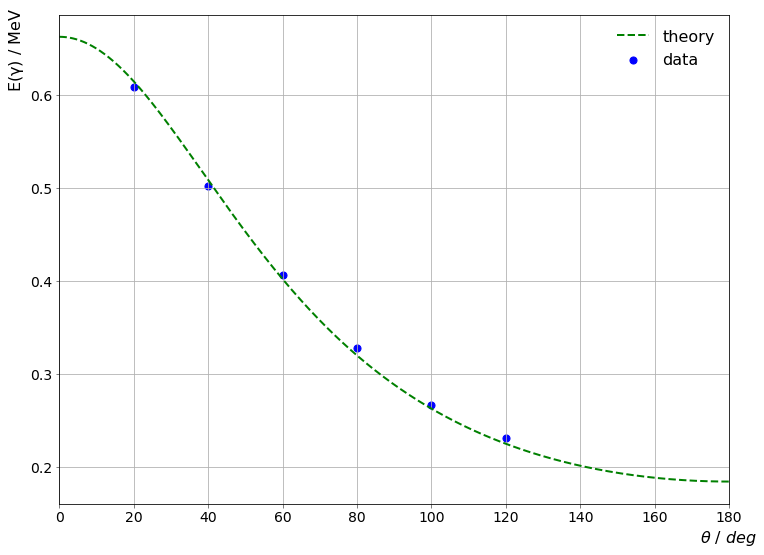

In [7]:
from numpy import array
from numpy import linspace
import matplotlib.pyplot as plt

theta_range=linspace(0,180,1000)

hnu_predict=[hnu(theta_range[i]) for i in range(1000)]
hnu_predict=array(hnu_predict)
Ex=[E(x[i]) for i in range(len(x))]
Ex=array(Ex)
plt.figure(figsize=(12,9))
plt.plot(theta_range, hnu_predict, color='green',linewidth=2.0,linestyle='dashed', label='theory')
plt.scatter([20,40,60,80,100,120],Ex,s=50,marker='o',color='blue', label='data')

#plt.ylim(0,1.4)

x_ticks=linspace(0,180,10)
#y_ticks=linspace(0,1.1,12)
plt.xticks(x_ticks)
#plt.yticks(y_ticks)
plt.tick_params(width=0.5, labelsize=14)
plt.legend(loc='upper right', frameon=False, fontsize=16)
plt.xlim(0,180)
ax=plt.gca()
ax.set_xlabel(r'$\theta\ /\ deg$', fontsize=16,x=1,y=1)
ax.set_ylabel(r'$\rm E(\gamma)\ /\ MeV$', fontsize=16,x=1,y=0.93,rotation=90)
#ax.spines['right'].set_color('none')
#ax.spines['top'].set_color('none')
#ax.xaxis.set_ticks_position('bottom')
#ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
#ax.spines['left'].set_position(('data',0))
#ax.set_title('y = x^2',fontsize=14,color='r')
plt.grid()
#x_major_locator=MultipleLocator(0.1)
#y_major_locator=MultipleLocator(50)
#ax.xaxis.set_major_locator(x_major_locator)
#ax.yaxis.set_major_locator(y_major_locator)
plt.savefig('./phyex2_fig3.pdf')
plt.show()

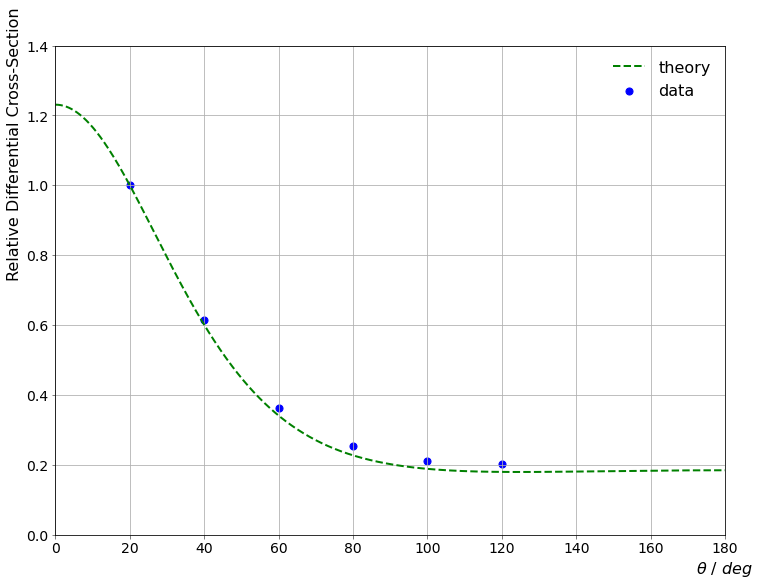

In [8]:
from numpy import array
from numpy import linspace
import matplotlib.pyplot as plt

x_range=linspace(0,180,1000)

y_predict=[relative_xsection(x_range[i]) for i in range(1000)]
y_predict=array(y_predict)
plt.figure(figsize=(12,9))
plt.plot(x_range, y_predict, color='green',linewidth=2.0,linestyle='dashed', label='theory')
plt.scatter([20,40,60,80,100,120],relative_data,s=50,marker='o',color='blue', label='data')

plt.ylim(0,1.4)

x_ticks=linspace(0,180,10)
#y_ticks=linspace(0,1.1,12)
plt.xticks(x_ticks)
#plt.yticks(y_ticks)
plt.tick_params(width=0.5, labelsize=14)
plt.legend(loc='upper right', frameon=False, fontsize=16)
plt.xlim(0,180)
ax=plt.gca()
ax.set_xlabel(r'$\theta\ /\ deg$', fontsize=16,x=1,y=1)
ax.set_ylabel(r'Relative Differential Cross-Section', fontsize=16,x=1,y=0.8,rotation=90)
#ax.spines['right'].set_color('none')
#ax.spines['top'].set_color('none')
#ax.xaxis.set_ticks_position('bottom')
#ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
#ax.spines['left'].set_position(('data',0))
#ax.set_title('y = x^2',fontsize=14,color='r')
plt.grid()
#x_major_locator=MultipleLocator(0.1)
#y_major_locator=MultipleLocator(50)
#ax.xaxis.set_major_locator(x_major_locator)
#ax.yaxis.set_major_locator(y_major_locator)
plt.savefig('./phyex2_fig4.pdf')
plt.show()

In [9]:
E_th=[hnu(20*(i+1)) for i in range(6)]
for i in range(len(x)):
    print()
    print("%g & %+g"%(Ex[i],(Ex[i]-E_th[i])/E_th[i]))


0.608185 & -0.0095144

0.502156 & -0.0115493

0.405766 & +0.00997171

0.327277 & +0.0236257

0.266689 & +0.0153774

0.230887 & +0.0265238


In [10]:
relative_th=[relative_xsection(20*(i+1)) for i in range(6)]

for i in range(len(x)):
    print()
    print("%g & %+g"%(relative_data[i],(relative_data[i]-relative_th[i])/relative_th[i]*100))


1 & +0

0.613673 & +2.1639

0.361706 & +6.05363

0.253705 & +11.5969

0.212126 & +12.4408

0.203863 & +13.2857


In [11]:
## meet some trouble with this function
def cross_section(theta):
    m0c2=0.5109989376 ## MeV
    theta=theta*pi/180
    hnu0=0.662
    hnu=hnu0/(1+hnu0/m0c2*(1-cos(theta)))
    alpha=hnu0/m0c2
    r0=1
    numerator = 1 + alpha*(1-cos(theta))
    numerator *= (1+cos(theta)**2)
    numerator += (alpha*(1-cos(theta)))**2
    numerator *= r0*r0
    #numerator=r0*r0 * ((1+np.cos(theta)**2)*(1+alpha*(1-np.cos(theta))) + alpha**2 * (1-np.cos(theta))**2)
    denominator=2*( 1 + alpha*(1-cos(theta)) )**2
    return numerator/denominator